In [ ]:
!pip install segmentation_models_pytorch

In [ ]:
import os
import glob
from google.colab import drive

# 1. KẾT NỐI DRIVE
if not os.path.exists('/content/drive'):
    print("🔌 Đang kết nối Google Drive...")
    drive.mount('/content/drive')

# 2. CẤU HÌNH ĐƯỜNG DẪN
SOURCE_DIR = '/content/drive/MyDrive/archive'
DEST_DIR = '/content/archive_local'

# Tạo thư mục chứa nếu chưa có
if not os.path.exists(DEST_DIR):
    os.makedirs(DEST_DIR)
    print(f"📁 Đã tạo thư mục: {DEST_DIR}")

# 3. LỆNH COPY SIÊU TỐC
print("🚀 Bắt đầu COPY dữ liệu (Sẽ mất khoảng 1-2 phút)...")

# Copy Part 1
if os.path.exists(os.path.join(SOURCE_DIR, 'HAM10000_images_part_1')):
    print("   ... Đang copy Part 1")
    !cp -r "{SOURCE_DIR}/HAM10000_images_part_1" "{DEST_DIR}/"
else:
    print("⚠️ Không tìm thấy folder Part 1 trên Drive!")

# Copy Part 2
if os.path.exists(os.path.join(SOURCE_DIR, 'HAM10000_images_part_2')):
    print("   ... Đang copy Part 2")
    !cp -r "{SOURCE_DIR}/HAM10000_images_part_2" "{DEST_DIR}/"
else:
    print("⚠️ Không tìm thấy folder Part 2 trên Drive!")

# Copy Masks (Segmentation)
if os.path.exists(os.path.join(SOURCE_DIR, 'HAM10000_segmentations_lesion_tschandl')):
    print("   ... Đang copy Masks")
    !cp -r "{SOURCE_DIR}/HAM10000_segmentations_lesion_tschandl" "{DEST_DIR}/"
else:
    print("⚠️ Không tìm thấy folder Masks trên Drive!")

# 4. KIỂM TRA LẠI
print("\n📊 KIỂM TRA KẾT QUẢ:")
try:
    n_part1 = len(glob.glob(f"{DEST_DIR}/HAM10000_images_part_1/*.jpg"))
    n_part2 = len(glob.glob(f"{DEST_DIR}/HAM10000_images_part_2/*.jpg"))
    n_masks = len(glob.glob(f"{DEST_DIR}/HAM10000_segmentations_lesion_tschandl/*.png"))

    print(f"   ✅ Part 1: {n_part1} ảnh")
    print(f"   ✅ Part 2: {n_part2} ảnh")
    print(f"   ✅ Masks : {n_masks} ảnh")
    print(f"   👉 TỔNG ẢNH GỐC: {n_part1 + n_part2}")

    if (n_part1 + n_part2) > 10000:
        print("\n🎉 Dữ liệu đã sẵn sàng! Bạn có thể chạy code Train.")
    else:
        print("\n⚠️ Có vẻ thiếu ảnh. Hãy kiểm tra lại đường dẫn Drive.")

except Exception as e:
    print(f"❌ Lỗi khi kiểm tra: {e}")

🚀 Bắt đầu COPY dữ liệu (Sẽ mất khoảng 1-2 phút)...
   ... Đang copy Part 1
   ... Đang copy Part 2
   ... Đang copy Masks

📊 KIỂM TRA KẾT QUẢ:
   ✅ Part 1: 5000 ảnh
   ✅ Part 2: 5015 ảnh
   ✅ Masks : 10015 ảnh
   👉 TỔNG ẢNH GỐC: 10015

🎉 Dữ liệu đã sẵn sàng! Bạn có thể chạy code Train.


In [ ]:
import os
import glob

# Đường dẫn dữ liệu trên máy Colab
base_path = '/content/archive_local'

# 1. Định nghĩa các folder con (Dựa trên tên folder gốc của bạn)
# Lưu ý: Nếu lệnh cp của bạn copy cả folder mẹ "archive", bạn có thể cần thêm /archive vào đường dẫn
part1_path = os.path.join(base_path, 'HAM10000_images_part_1')
part2_path = os.path.join(base_path, 'HAM10000_images_part_2')
mask_path = os.path.join(base_path, 'HAM10000_segmentations_lesion_tschandl')

# 2. Đếm số lượng file
try:
    count_part1 = len(glob.glob(os.path.join(part1_path, '*.jpg')))
    count_part2 = len(glob.glob(os.path.join(part2_path, '*.jpg')))
    count_masks = len(glob.glob(os.path.join(mask_path, '*.png')))

    total_images = count_part1 + count_part2

    print("📊 KẾT QUẢ KIỂM TRA:")
    print(f"   - Part 1: {count_part1} ảnh")
    print(f"   - Part 2: {count_part2} ảnh")
    print(f"   - Masks : {count_masks} ảnh")
    print("-" * 30)
    print(f"✅ TỔNG CỘNG: {total_images} ảnh gốc")

    # 3. Đánh giá
    if total_images > 9000:
        print("\n🎉 Dữ liệu đã ĐỦ! Bạn có thể bắt đầu train ngay lập tức.")
    elif total_images == 0:
        print("\n❌ LỖI: Thư mục rỗng! Có thể lệnh copy bị sai đường dẫn.")
        print(f"Hãy kiểm tra xem trong '{base_path}' có gì bằng lệnh: os.listdir(base_path)")
    else:
        print("\n⚠️ CẢNH BÁO: Số lượng ảnh hơi ít so với bộ gốc. Hãy kiểm tra lại.")

except Exception as e:
    print(f"❌ Có lỗi khi đọc thư mục: {e}")
    # In ra danh sách thư mục hiện có để debug
    print(f"Các thư mục đang có trong {base_path}:")
    print(os.listdir(base_path))

📊 KẾT QUẢ KIỂM TRA:
   - Part 1: 5000 ảnh
   - Part 2: 5015 ảnh
   - Masks : 10015 ảnh
------------------------------
✅ TỔNG CỘNG: 10015 ảnh gốc

🎉 Dữ liệu đã ĐỦ! Bạn có thể bắt đầu train ngay lập tức.


📊 TỔNG QUAN DATASET:
   - Số lượng ảnh Train: 7010
   - Số lượng ảnh Val:   1002
   - Số lượng ảnh Test:  2003
   - Kích thước ảnh: 256x256
   - Số class: 2 (0: Nền, 1: Tổn thương)


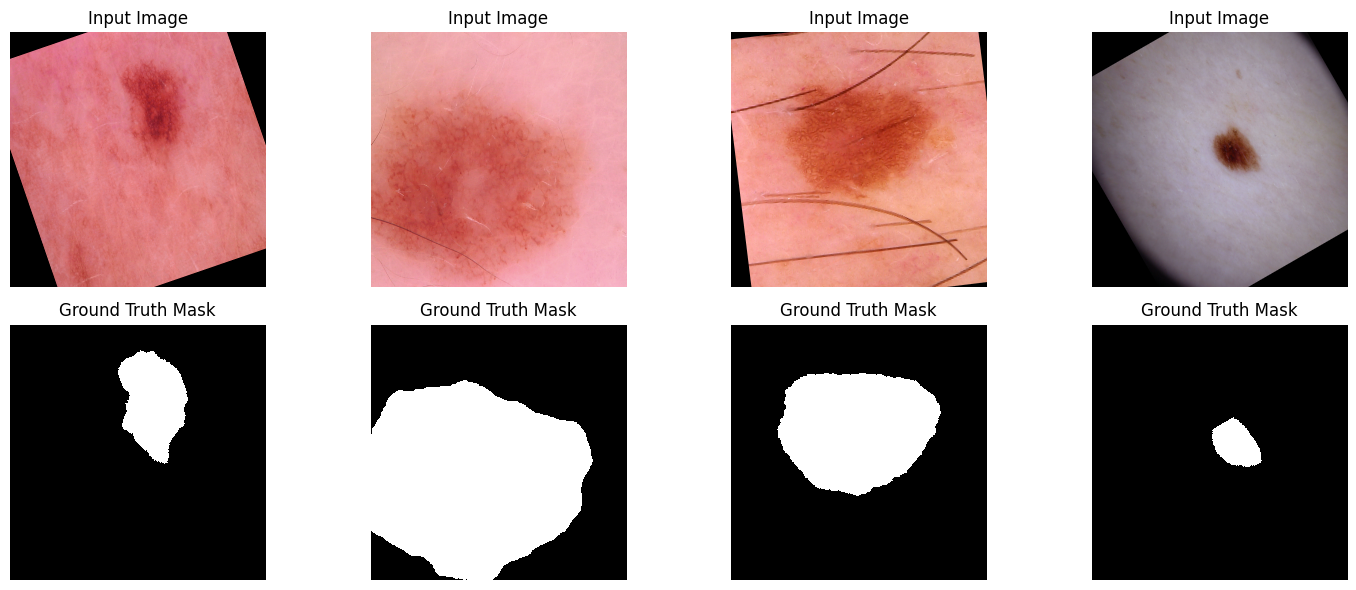

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- CODE CHO MỤC 3: HIỂN THỊ DATASET ---
def visualize_dataset_sample(loader, num_samples=4):
    print(f"📊 TỔNG QUAN DATASET:")
    print(f"   - Số lượng ảnh Train: {len(train_set)}")
    print(f"   - Số lượng ảnh Val:   {len(val_set)}")
    print(f"   - Số lượng ảnh Test:  {len(test_set)}")
    print(f"   - Kích thước ảnh: {IMG_SIZE}x{IMG_SIZE}")
    print(f"   - Số class: 2 (0: Nền, 1: Tổn thương)")

    # Lấy 1 batch để hiển thị
    images, masks = next(iter(loader))

    plt.figure(figsize=(15, 6))
    for i in range(num_samples):
        # 1. Xử lý ảnh (Denormalize để hiển thị màu da người thật)
        img = images[i].permute(1, 2, 0).cpu().numpy()
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean
        img = np.clip(img, 0, 1) # Đảm bảo giá trị pixel hợp lệ

        # 2. Xử lý mask
        mask = masks[i].squeeze().cpu().numpy()

        # Vẽ Ảnh Gốc
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(img)
        plt.title("Input Image")
        plt.axis('off')

        # Vẽ Mask (Nhãn)
        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.imshow(mask, cmap='gray')
        plt.title("Ground Truth Mask")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Gọi hàm (Dùng train_loader để lấy mẫu)
visualize_dataset_sample(train_loader)

In [ ]:
import os
import cv2
import glob
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm  # Thanh tiến trình
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
from google.colab import drive

if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

SOURCE_DIR = '/content/drive/MyDrive/archive'
DEST_DIR = '/content/archive_local'
# ==========================================
# 2. CẤU HÌNH ĐƯỜNG DẪN SAU KHI COPY
# ==========================================
# Bây giờ chúng ta trỏ vào folder "archive_local" đã copy xong
IMG_DIR_1 = os.path.join(DEST_DIR, 'HAM10000_images_part_1')
IMG_DIR_2 = os.path.join(DEST_DIR, 'HAM10000_images_part_2')
MASK_DIR = os.path.join(DEST_DIR, 'HAM10000_segmentations_lesion_tschandl')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🔥 Hardware: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")

# ==========================================
# 3. DATASET CLASS (Code của bạn OK, giữ nguyên)
# ==========================================
class HAM10000Dataset(Dataset):
    def __init__(self, img_dir1, img_dir2, mask_dir, transform=None):
        self.transform = transform
        self.mask_dir = mask_dir
        # Gộp danh sách file
        self.image_paths = sorted(glob.glob(os.path.join(img_dir1, "*.jpg")) +
                                  glob.glob(os.path.join(img_dir2, "*.jpg")))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]

        # Logic ghép tên file
        filename = os.path.basename(img_path)
        image_id = filename.replace(".jpg", "")
        mask_filename = image_id + "_segmentation.png"
        mask_path = os.path.join(self.mask_dir, mask_filename)

        # Đọc ảnh (Thêm xử lý lỗi None cho chắc chắn)
        image = cv2.imread(img_path)
        if image is None: # Phòng trường hợp ảnh lỗi lúc copy
             image = np.zeros((256, 256, 3), dtype=np.uint8)
        else:
             image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if mask is None:
            mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        mask = (mask > 0).float().unsqueeze(0)
        return image, mask

🔥 Hardware: CPU


In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import DataLoader, Dataset, Subset
import numpy as np
from sklearn.model_selection import train_test_split

# ==========================================
# 4. CHUẨN BỊ DỮ LIỆU (Đã sửa lỗi & Nâng cấp)
# ==========================================
IMG_SIZE = 256

# 1. Augmentation MẠNH (Cho tập Train)
train_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),

    # Biến đổi hình học
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=30, p=0.5),

    # Biến đổi màu sắc & Nhiễu (Giúp model bền vững hơn)
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05, p=0.2),
    A.GaussianBlur(blur_limit=(3, 5), p=0.1),

    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

# 2. Transform cơ bản (Cho Val/Test)
val_test_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

# 3. Class bọc Subset để giải quyết lỗi dùng chung transform
class SubsetWrapper(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        # Lấy ảnh gốc từ dataset cha
        image, mask = self.subset.dataset[self.subset.indices[index]]

        # Áp dụng transform mới (nếu có)
        if self.transform:
            # Lưu ý: Hàm __getitem__ gốc của HAM10000Dataset có thể đã trả về tensor hoặc numpy
            # Để an toàn, chúng ta giả định HAM10000Dataset trả về ảnh gốc (numpy) chưa qua transform
            # Nếu code dataset cũ đã transform rồi thì cần sửa lại Dataset gốc để trả raw data.
            # TUY NHIÊN, cách đơn giản nhất ở đây là tạo 2 dataset riêng biệt:
            pass
        return image, mask

    def __len__(self):
        return len(self.subset)

# --- CÁCH SỬA ĐƠN GIẢN NHẤT (Tạo 2 Dataset riêng) ---
# Load 2 bản dataset riêng biệt để tránh xung đột transform
train_dataset_full = HAM10000Dataset(IMG_DIR_1, IMG_DIR_2, MASK_DIR, transform=train_transform)
val_test_dataset_full = HAM10000Dataset(IMG_DIR_1, IMG_DIR_2, MASK_DIR, transform=val_test_transform)

# Lấy indices để chia
total_size = len(train_dataset_full)
indices = list(range(total_size))
train_size = int(0.7 * total_size)
test_size = int(0.2 * total_size)
val_size = total_size - train_size - test_size

# Chia index ngẫu nhiên
train_indices, temp_indices = train_test_split(indices, train_size=train_size, random_state=42)
test_indices, val_indices = train_test_split(temp_indices, train_size=test_size, random_state=42)

# Tạo Subset từ đúng Dataset nguồn
train_set = Subset(train_dataset_full, train_indices)      # Dùng augmentation mạnh
val_set   = Subset(val_test_dataset_full, val_indices)     # Dùng augmentation thường
test_set  = Subset(val_test_dataset_full, test_indices)    # Dùng augmentation thường

# Tạo DataLoader
train_loader = DataLoader(train_set, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_set, batch_size=16, shuffle=False, num_workers=2)
test_loader = DataLoader(test_set, batch_size=16, shuffle=False, num_workers=2)

print(f"✅ Đã chia dữ liệu và Fix lỗi Transform:")
print(f"   - Train (Augment Mạnh): {len(train_set)} ảnh")
print(f"   - Val/Test (Chuẩn): {len(val_set)} / {len(test_set)} ảnh")

✅ Đã chia dữ liệu và Fix lỗi Transform:
   - Train (Augment Mạnh): 7010 ảnh
   - Val/Test (Chuẩn): 1002 / 2003 ảnh


In [ ]:
import torch.nn as nn

# ==========================================
# 4. MODEL, LOSS & OPTIMIZER
# ==========================================
model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1
).to(device)

# --- ĐỊNH NGHĨA 2 HÀM LOSS ---
# 1. Segmentation Loss (Dice): Giúp model học hình dáng, vùng chồng lấp
criterion_dice = smp.losses.DiceLoss(mode='binary', from_logits=True)

# 2. Classification Loss (BCE): Giúp model phân loại chính xác từng điểm ảnh (Pixel-wise Classification)
criterion_bce = nn.BCEWithLogitsLoss()

# Optimizer & Scheduler
optimizer = optim.Adam(model.parameters(), lr=0.0003, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=3)

# --- HÀM TÍNH METRICS  ---
def calculate_metrics(pred, target, threshold=0.5):
    pred = (pred > threshold).float()
    pred = pred.view(-1)
    target = target.view(-1)

    # Epsilon để tránh chia cho 0
    smooth = 1e-6

    # Accuracy
    correct = (pred == target).float().sum()
    accuracy = correct / target.numel()

    # IoU
    intersection = (pred * target).sum()
    union = pred.sum() + target.sum() - intersection
    iou = (intersection + smooth) / (union + smooth)

    # Dice Score (F1)
    dice = (2.0 * intersection + smooth) / (pred.sum() + target.sum() + smooth)

    return accuracy.item(), iou.item(), dice.item()

In [ ]:
# ==========================================
# 5. TRAINING LOOP
# ==========================================
NUM_EPOCHS = 30
history = {
    'train_loss': [], 'train_bce': [], 'train_dice_loss': [],
    'train_acc': [], 'train_iou': [], 'train_dice_score': [],

    'val_loss': [], 'val_bce': [], 'val_dice_loss': [],
    'val_acc': [], 'val_iou': [], 'val_dice_score': []
}
best_iou = 0.0

print("\n🚀 BẮT ĐẦU TRAIN (COMBO: DICE LOSS + BCE LOSS)...")

for epoch in range(NUM_EPOCHS):
    # ==========================
    # 1. TRAIN
    # ==========================
    model.train()
    # Các biến tích lũy
    train_total_loss = 0
    train_bce = 0
    train_dice_loss = 0
    train_acc = 0
    train_iou = 0
    train_dice_score = 0

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Train]")

    for images, masks in loop:
        images, masks = images.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(images) # Logits (chưa qua sigmoid)

        # --- TÍNH LOSS KÉP ---
        loss_d = criterion_dice(outputs, masks) # Loss Dice
        loss_b = criterion_bce(outputs, masks)  # Loss Classification (BCE)

        # Tổng hợp: 50% Dice + 50% BCE (Bạn có thể đổi tỷ lệ nếu muốn)
        loss = loss_d + loss_b

        loss.backward()
        optimizer.step()

        # Tính Metrics (Accuracy, IoU, Dice Score)
        probs = torch.sigmoid(outputs)
        acc, iou, dice = calculate_metrics(probs, masks)

        # Cộng dồn
        train_total_loss += loss.item()
        train_bce        += loss_b.item()
        train_dice_loss  += loss_d.item()
        train_acc        += acc
        train_iou        += iou
        train_dice_score += dice

        # Hiển thị lên thanh loading
        loop.set_postfix(Total=loss.item(), BCE=loss_b.item(), DiceL=loss_d.item(), IoU=iou, DiceS=dice)

    # ==========================
    # 2. VALIDATION
    # ==========================
    model.eval()
    val_total_loss = 0
    val_bce = 0
    val_dice_loss = 0
    val_acc = 0
    val_iou = 0
    val_dice_score = 0

    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)

            # Tính Loss
            loss_d = criterion_dice(outputs, masks)
            loss_b = criterion_bce(outputs, masks)
            loss = loss_d + loss_b

            # Tính Metrics
            probs = torch.sigmoid(outputs)
            acc, iou, dice = calculate_metrics(probs, masks)

            val_total_loss += loss.item()
            val_bce        += loss_b.item()
            val_dice_loss  += loss_d.item()
            val_acc        += acc
            val_iou        += iou
            val_dice_score += dice

    # --- TÍNH TRUNG BÌNH ---
    # Train
    avg_train_loss = train_total_loss / len(train_loader)
    avg_train_bce  = train_bce / len(train_loader)
    avg_train_dl   = train_dice_loss / len(train_loader)
    avg_train_acc  = train_acc / len(train_loader)
    avg_train_iou  = train_iou / len(train_loader)
    avg_train_ds   = train_dice_score / len(train_loader)

    # Val
    avg_val_loss = val_total_loss / len(val_loader)
    avg_val_bce  = val_bce / len(val_loader)
    avg_val_dl   = val_dice_loss / len(val_loader)
    avg_val_acc  = val_acc / len(val_loader)
    avg_val_iou  = val_iou / len(val_loader)
    avg_val_ds   = val_dice_score / len(val_loader)

    # Lưu lịch sử
    history['train_loss'].append(avg_train_loss)
    history['train_bce'].append(avg_train_bce)
    history['train_dice_loss'].append(avg_train_dl)
    history['train_acc'].append(avg_train_acc)
    history['train_iou'].append(avg_train_iou)
    history['train_dice_score'].append(avg_train_ds)

    history['val_loss'].append(avg_val_loss)
    history['val_bce'].append(avg_val_bce)
    history['val_dice_loss'].append(avg_val_dl)
    history['val_acc'].append(avg_val_acc)
    history['val_iou'].append(avg_val_iou)
    history['val_dice_score'].append(avg_val_ds)

    # Scheduler & Checkpoint
    scheduler.step(avg_val_iou)

    print(f"🏁 Epoch {epoch+1} Summary:")
    print(f"   Train | Loss: {avg_train_loss:.4f} (BCE: {avg_train_bce:.3f}, DiceL: {avg_train_dl:.3f}) | Acc: {avg_train_acc:.3f} | IoU: {avg_train_iou:.3f} | DiceScore: {avg_train_ds:.3f}")
    print(f"   Valid | Loss: {avg_val_loss:.4f} (BCE: {avg_val_bce:.3f}, DiceL: {avg_val_dl:.3f}) | Acc: {avg_val_acc:.3f} | IoU: {avg_val_iou:.3f} | DiceScore: {avg_val_ds:.3f}")

    if avg_val_iou > best_iou:
        best_iou = avg_val_iou
        torch.save(model.state_dict(), "best_unet_ham10000_v2.pth")
    print("-" * 80)


🚀 BẮT ĐẦU TRAIN (COMBO: DICE LOSS + BCE LOSS)...


Epoch 1/30 [Train]:   2%|▏         | 9/439 [03:39<2:55:10, 24.44s/it, BCE=0.512, DiceL=0.429, DiceS=0.763, IoU=0.617, Total=0.941]


KeyboardInterrupt: 

In [ ]:
import pandas as pd

def generate_segmentation_report_fixed(history):
    # 1. Tự động tạo list Epoch dựa trên độ dài của train_loss
    # (Thay vì bắt buộc phải có key 'epoch')
    if 'train_loss' in history:
        num_epochs = len(history['train_loss'])
        epochs = list(range(1, num_epochs + 1))
    else:
        print("❌ Lỗi: Không tìm thấy dữ liệu 'train_loss' trong history.")
        return

    # 2. Tạo DataFrame
    # Lưu ý: Mình đã sửa lại các key bên phải cho khớp với notebook của bạn ('dice_score' thay vì 'dice')
    data = {
        'Epoch': epochs,
        'Train Loss': history.get('train_loss', []),
        'Val Loss': history.get('val_loss', []),
        'Train IoU': history.get('train_iou', []),
        'Val IoU': history.get('val_iou', []),
        # Sửa key: 'train_dice_score' mới đúng (code cũ là 'train_dice')
        'Train Dice': history.get('train_dice_score', history.get('train_dice', [])),
        'Val Dice': history.get('val_dice_score', history.get('val_dice', [])),
        'Train Acc': history.get('train_acc', []),
        'Val Acc': history.get('val_acc', [])
    }

    # Lọc bỏ cột rỗng
    data = {k: v for k, v in data.items() if len(v) > 0}

    df = pd.DataFrame(data)

    # 3. Định dạng hiển thị
    if 'Epoch' in df.columns:
        df.set_index('Epoch', inplace=True)

    pd.options.display.float_format = '{:,.4f}'.format

    print("\n" + "="*50)
    print("📊 BẢNG TỔNG HỢP HUẤN LUYỆN (SEGMENTATION)")
    print("="*50)

    display(df)

    # 4. Tìm Best Epoch
    if 'Val Dice' in df.columns:
        best_epoch = df['Val Dice'].idxmax()
        print(f"\n🏆 Epoch tốt nhất (theo Dice): {best_epoch}")
        print(df.loc[best_epoch])
    elif 'Val IoU' in df.columns:
        best_epoch = df['Val IoU'].idxmax()
        print(f"\n🏆 Epoch tốt nhất (theo IoU): {best_epoch}")
        print(df.loc[best_epoch])

# Gọi hàm đã sửa
try:
    generate_segmentation_report_fixed(history)
except NameError:
    print("❌ Không tìm thấy biến 'history'.")
except Exception as e:
    print(f"❌ Lỗi: {e}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dice_from_history(history):
    epochs = range(1, len(history['train_iou']) + 1)

    # 1. Chuyển đổi IoU -> Dice
    # Công thức: Dice = 2*IoU / (1+IoU)
    train_iou = np.array(history['train_iou'])
    val_iou = np.array(history['val_iou'])

    train_dice = (2 * train_iou) / (1 + train_iou)
    val_dice = (2 * val_iou) / (1 + val_iou)

    # 2. Vẽ biểu đồ
    plt.figure(figsize=(10, 6))

    plt.plot(epochs, train_dice, label='Train Dice', color='navy', marker='o', linewidth=2)
    plt.plot(epochs, val_dice, label='Val Dice', color='darkorange', linestyle='--', marker='s', linewidth=2)

    plt.title('DICE COEFFICIENT OVER EPOCHS', fontsize=14, fontweight='bold')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Dice Score', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylim(0, 1) # Dice luôn nằm trong khoảng [0, 1]

    # Hiện số liệu max
    max_dice = max(val_dice)
    plt.text(len(epochs), max_dice, f'Max: {max_dice:.4f}', ha='right', va='bottom', fontsize=12, color='red')

    plt.show()

# Gọi hàm
try:
    plot_dice_from_history(history)
except NameError:
    print("❌ Không tìm thấy biến 'history'. Hãy chạy xong Training trước nhé!")

In [ ]:
import matplotlib.pyplot as plt

# ==========================================
# VẼ BIỂU ĐỒ (FULL METRICS)
# ==========================================
def plot_training_history(history):
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    epochs = range(1, len(history['train_loss']) + 1)

    # ----------------------------------------
    # BIỂU ĐỒ 1: PHÂN TÍCH LOSS (Loss Breakdown)
    # ----------------------------------------
    ax1 = axes[0]
    # Vẽ Loss Tổng (Nét liền đậm)
    ax1.plot(epochs, history['train_loss'], label='Train Total', color='red', linewidth=2)
    ax1.plot(epochs, history['val_loss'], label='Val Total', color='orange', linewidth=2)

    # Vẽ Loss Thành phần (BCE & Dice Loss - Nét đứt)
    ax1.plot(epochs, history['train_bce'], label='Train BCE', color='blue', linestyle='--', alpha=0.5)
    ax1.plot(epochs, history['train_dice_loss'], label='Train DiceL', color='green', linestyle='--', alpha=0.5)

    ax1.set_title('Loss Dynamics (Phân tích chi tiết)')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss Value')
    ax1.legend()
    ax1.grid(True)

    # ----------------------------------------
    # BIỂU ĐỒ 2: PIXEL ACCURACY
    # ----------------------------------------
    ax2 = axes[1]
    ax2.plot(epochs, history['train_acc'], label='Train Acc', color='navy', linewidth=2)
    ax2.plot(epochs, history['val_acc'], label='Val Acc', color='cyan', linewidth=2)

    ax2.set_title('Pixel Accuracy (Độ chính xác từng điểm ảnh)')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy (0-1)')
    ax2.legend()
    ax2.grid(True)

    # ----------------------------------------
    # BIỂU ĐỒ 3: CHẤT LƯỢNG SEGMENTATION (IoU & Dice Score)
    # ----------------------------------------
    ax3 = axes[2]
    # Vẽ IoU
    ax3.plot(epochs, history['train_iou'], label='Train IoU', color='purple', linewidth=2)
    ax3.plot(epochs, history['val_iou'], label='Val IoU', color='magenta', linewidth=2)

    # Vẽ Dice Score (Thường cao hơn IoU một chút - Nét chấm bi)
    ax3.plot(epochs, history['train_dice_score'], label='Train Dice Score', color='darkgreen', linestyle=':', linewidth=2)
    ax3.plot(epochs, history['val_dice_score'], label='Val Dice Score', color='limegreen', linestyle=':', linewidth=2)

    ax3.set_title('Segmentation Quality (IoU vs Dice Score)')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('Score (0-1)')
    ax3.legend()
    ax3.grid(True)

    plt.tight_layout()
    plt.savefig('training_curves_full.png') # Lưu ảnh lại để chèn báo cáo
    plt.show()

# Gọi hàm
print("📊 BIỂU ĐỒ HUẤN LUYỆN CHI TIẾT:")
plot_training_history(history)

In [ ]:
# --- CODE CHO MỤC 5.2: ĐÁNH GIÁ ĐỊNH LƯỢNG TRÊN TEST SET ---

# 1. Load lại model tốt nhất đã lưu
print("⏳ Đang load model tốt nhất để đánh giá...")
best_model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights=None,
    in_channels=3,
    classes=1
).to(device)
best_model.load_state_dict(torch.load("best_unet_ham10000_v2.pth"))
best_model.eval()

# 2. Chạy đánh giá
test_acc, test_iou, test_dice = 0, 0, 0
count = 0

print("🚀 Đang chạy trên Test Set...")
with torch.no_grad():
    for images, masks in tqdm(test_loader, desc="Testing"):
        images, masks = images.to(device), masks.to(device)
        outputs = best_model(images)
        probs = torch.sigmoid(outputs)

        # Gọi hàm tính metrics (đã định nghĩa ở phần train)
        acc, iou, dice = calculate_metrics(probs, masks)

        test_acc += acc
        test_iou += iou
        test_dice += dice
        count += 1

# 3. In bảng kết quả đẹp để copy vào báo cáo
print("\n" + "="*40)
print("   KẾT QUẢ ĐỊNH LƯỢNG (TEST SET)")
print("="*40)
print(f"| {'Metric':<20} | {'Value':<10} |")
print(f"|{'-'*22}|{'-'*12}|")
print(f"| {'Pixel Accuracy':<20} | {test_acc/count:.4f}     |")
print(f"| {'IoU Score':<20} | {test_iou/count:.4f}     |")
print(f"| {'Dice Score':<20} | {test_dice/count:.4f}     |")
print("="*40)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Dữ liệu (Theo số liệu bạn cung cấp)
metrics = ['Pixel Accuracy', 'IoU Score', 'Dice Score']
values = [0.9718, 0.9013, 0.9477]
colors = ['#2ca02c', '#1f77b4', '#ff7f0e'] # Xanh lá, Xanh dương, Cam

# 2. Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=colors, width=0.5)

# 3. Thêm số liệu lên đầu cột cho dễ nhìn
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.01,
        f'{yval:.4f}',
        ha='center', va='bottom',
        fontsize=12, fontweight='bold'
    )

# 4. Trang trí
plt.ylim(0, 1.1) # Giới hạn trục Y từ 0 đến 1.1 để số không bị cắt
plt.ylabel('Giá trị (Score)', fontsize=11)
plt.title('KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH SEGMENTATION (TEST SET)', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# --- CODE CHO MỤC 5.3: TRỰC QUAN HÓA KẾT QUẢ DỰ ĐOÁN ---
def visualize_predictions(model, loader, num_samples=3):
    model.eval()
    images, masks = next(iter(loader))
    images = images.to(device)

    with torch.no_grad():
        outputs = model(images)
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.5).float() # Ngưỡng 0.5

    plt.figure(figsize=(12, num_samples * 3))

    for i in range(num_samples):
        # Denormalize ảnh gốc
        img = images[i].permute(1, 2, 0).cpu().numpy()
        mean = np.array([0.485, 0.456, 0.406]); std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean
        img = np.clip(img, 0, 1)

        # Cột 1: Ảnh gốc
        plt.subplot(num_samples, 3, i*3 + 1)
        plt.imshow(img)
        plt.title("Original Image")
        plt.axis('off')

        # Cột 2: Ground Truth
        plt.subplot(num_samples, 3, i*3 + 2)
        plt.imshow(masks[i].cpu().squeeze(), cmap='gray')
        plt.title("Ground Truth Mask")
        plt.axis('off')

        # Cột 3: Prediction (Máy đoán)
        plt.subplot(num_samples, 3, i*3 + 3)
        plt.imshow(preds[i].cpu().squeeze(), cmap='gray')
        plt.title("AI Prediction")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("🖼️ SO SÁNH KẾT QUẢ :")
visualize_predictions(best_model, test_loader)

In [ ]:
# --- CODE CHO MỤC 6: PHÂN TÍCH LỖI (ERROR ANALYSIS) ---
def analyze_worst_cases(model, loader, num_cases=3):
    print("🔍 Đang tìm các trường hợp model đoán sai nhất (Worst Cases)...")
    model.eval()
    worst_samples = []

    with torch.no_grad():
        for images, masks in loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            probs = torch.sigmoid(outputs)

            # Tính IoU cho từng ảnh lẻ
            for i in range(images.size(0)):
                pred = (probs[i] > 0.5).float()

                # Tính IoU riêng lẻ
                inter = (pred * masks[i]).sum()
                union = pred.sum() + masks[i].sum() - inter
                iou = (inter / (union + 1e-6)).item()

                # Lưu lại để so sánh
                worst_samples.append({
                    'iou': iou,
                    'img': images[i],
                    'mask': masks[i],
                    'pred': pred
                })

    # Sắp xếp theo IoU tăng dần (Thấp nhất lên đầu)
    worst_samples.sort(key=lambda x: x['iou'])

    # Vẽ hình các ca "khó đỡ" nhất
    plt.figure(figsize=(12, num_cases * 3))
    for i in range(num_cases):
        sample = worst_samples[i]

        # Denormalize
        img = sample['img'].permute(1, 2, 0).cpu().numpy()
        mean = np.array([0.485, 0.456, 0.406]); std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean
        img = np.clip(img, 0, 1)

        plt.subplot(num_cases, 3, i*3 + 1)
        plt.imshow(img)
        plt.title(f"Case #{i+1} (Input)")
        plt.axis('off')

        plt.subplot(num_cases, 3, i*3 + 2)
        plt.imshow(sample['mask'].cpu().squeeze(), cmap='gray')
        plt.title("Ground Truth")
        plt.axis('off')

        plt.subplot(num_cases, 3, i*3 + 3)
        plt.imshow(sample['pred'].cpu().squeeze(), cmap='gray')
        plt.title(f"Prediction (Bad IoU: {sample['iou']:.2f})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("⚠️ CÁC TRƯỜNG HỢP LỖI ĐIỂN HÌNH:")
analyze_worst_cases(best_model, test_loader)